In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
import spacy
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string
from nltk.util import ngrams
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
!python3 -m spacy download en_core_web_md
nltk.download('punkt')
!pip3 install textstat
from textstat import gunning_fog
!pip install pyspellchecker
from spellchecker import SpellChecker

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


2024-01-18 03:53:51.330925: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-18 03:53:51.330975: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-18 03:53:51.332209: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-18 03:53:52.388382: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 27.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 20.9 MB/s eta 0:00:00


In [ ]:
summaries_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/My_project/summaries_test.csv')
summaries_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/My_project/summaries_train.csv')
prompt_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/My_project/prompts_test.csv')
prompt_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/My_project/prompts_train.csv')

In [ ]:
summaries_train.shape

(7165, 5)

In [ ]:
summaries_train.head()

,student_id,prompt_id,text,content,wording
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757


In [ ]:
df_train = prompt_train.merge(summaries_train, on="prompt_id")
df_test = prompt_test.merge(summaries_test, on="prompt_id")

In [ ]:
df_train.head()

,prompt_id,prompt_question,prompt_title,prompt_text,student_id,text,content,wording
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00791789cc1f,1 element of an ideal tragedy is that it shoul...,-0.210614,-0.471415
1,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0086ef22de8f,The three elements of an ideal tragedy are: H...,-0.970237,-0.417058
2,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0094589c7a22,Aristotle states that an ideal tragedy should ...,-0.387791,-0.584181
3,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00cd5736026a,One element of an Ideal tragedy is having a co...,0.088882,-0.594710
4,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00d98b8ff756,The 3 ideal of tragedy is how complex you need...,-0.687288,-0.460886


In [ ]:

prompt_train.shape

(4, 4)

In [ ]:
df_train.drop(['prompt_id','prompt_title','student_id'],axis=1, inplace = True)

In [ ]:
df_train['prompt_text'][0]

'Chapter 13 \r\nAs the sequel to what has already been said, we must proceed to consider what the poet should aim at, and what he should avoid, in constructing his plots; and by what means the specific effect of Tragedy will be produced. \r\nA perfect tragedy should, as we have seen, be arranged not on the simple but on the complex plan. It should, moreover, imitate actions which excite pity and fear, this being the distinctive mark of tragic imitation. It follows plainly, in the first place, that the change of fortune presented must not be the spectacle of a virtuous man brought from prosperity to adversity: for this moves neither pity nor fear; it merely shocks us. Nor, again, that of a bad man passing from adversity to prosperity: for nothing can be more alien to the spirit of Tragedy; it possesses no single tragic quality; it neither satisfies the moral sense nor calls forth pity or fear. Nor, again, should the downfall of the utter villain be exhibited. A plot of this kind would, 

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7165 entries, 0 to 7164
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   prompt_question  7165 non-null   object 
 1   prompt_text      7165 non-null   object 
 2   text             7165 non-null   object 
 3   content          7165 non-null   float64
 4   wording          7165 non-null   float64
dtypes: float64(2), object(3)
memory usage: 593.9+ KB


In [ ]:
df_train.describe()

,content,wording
count,7165.000000,7165.000000
mean,-0.014853,-0.063072
std,1.043569,1.036048
min,-1.729859,-1.962614
25%,-0.799545,-0.872720
50%,-0.093814,-0.081769
75%,0.499660,0.503833
max,3.900326,4.310693


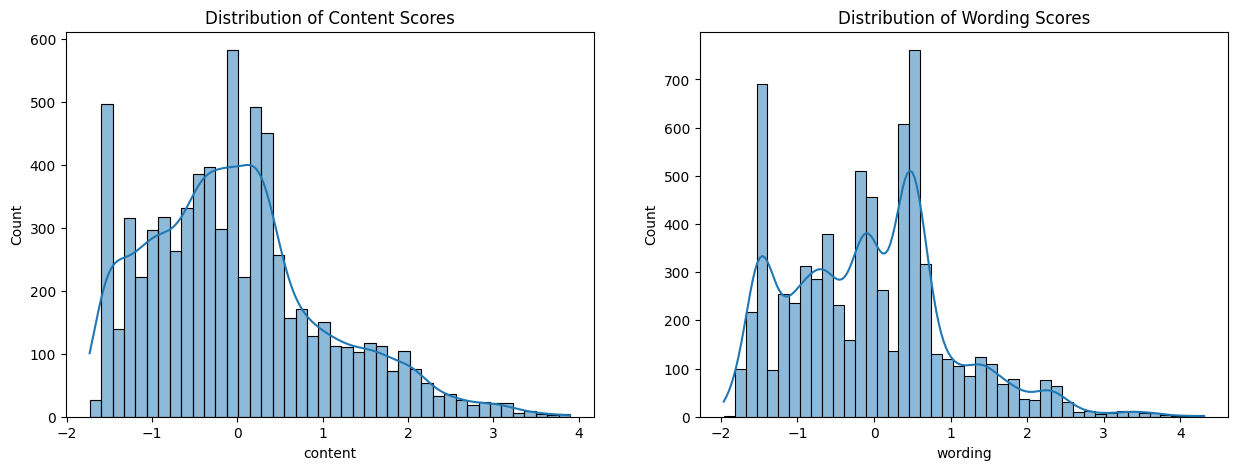

In [ ]:

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

a1=sns.histplot(data=df_train,kde = True, x='content')
a1.set_title("Distribution of Content Scores")
plt.subplot(1, 2, 2)
a2=sns.histplot(data=df_train,kde=True, x='wording')
a2.set_title("Distribution of Wording Scores")

plt.show()


## Insights:
- most of the students having content score less than 0 and wording count greater than 0
- 75% of the content scores fall below 0.4997. This implies that the majority of the dataset has content scores below this threshold.
- 75% of the wording scores fall below 0.5038. The majority of the dataset has wording scores below this threshold.
- Both content and wording scores have negative median values, indicating that, on average, the scores are on the lower side.
- The 75th percentiles for both scores are positive, suggesting that a significant portion of the data has higher scores, but they are likely influenced by potential outliers.
- The maximum content score is 3.9003, and the maximum wording score is 4.3107. These high maximum values may indicate the presence of outliers or extreme values in the dataset.

In [ ]:
def display_example(ex):
  display(Markdown("Prompt Context"))
  display(Markdown(ex['prompt_text']))
  print()
  display(Markdown("Prompt Question"))
  display(Markdown(ex['prompt_question']))
  print()
  display(Markdown("Student's Answer"))
  display(Markdown(ex['text']))
  print()
  display(Markdown(f"**Content Score**: {ex['content']}"))
  display(Markdown(f"**Wording Score**: {ex['wording']}"))

df_train_top_content = df_train.sort_values(by="content", ascending=False)
ex1 = df_train_top_content.iloc[0]
ex2 = df_train_top_content.iloc[3]



In [ ]:
ex2 = df_train_top_content.iloc[2]

In [ ]:
display_example(ex2)

Prompt Context

Chapter 13 
As the sequel to what has already been said, we must proceed to consider what the poet should aim at, and what he should avoid, in constructing his plots; and by what means the specific effect of Tragedy will be produced. 
A perfect tragedy should, as we have seen, be arranged not on the simple but on the complex plan. It should, moreover, imitate actions which excite pity and fear, this being the distinctive mark of tragic imitation. It follows plainly, in the first place, that the change of fortune presented must not be the spectacle of a virtuous man brought from prosperity to adversity: for this moves neither pity nor fear; it merely shocks us. Nor, again, that of a bad man passing from adversity to prosperity: for nothing can be more alien to the spirit of Tragedy; it possesses no single tragic quality; it neither satisfies the moral sense nor calls forth pity or fear. Nor, again, should the downfall of the utter villain be exhibited. A plot of this kind would, doubtless, satisfy the moral sense, but it would inspire neither pity nor fear; for pity is aroused by unmerited misfortune, fear by the misfortune of a man like ourselves. Such an event, therefore, will be neither pitiful nor terrible. There remains, then, the character between these two extremes — that of a man who is not eminently good and just, yet whose misfortune is brought about not by vice or depravity, but by some error of judgement or frailty. He must be one who is highly renowned and prosperous — a personage like Oedipus, Thyestes, or other illustrious men of such families. 
A well-constructed plot should, therefore, be single in its issue, rather than double as some maintain. The change of fortune should be not from bad to good, but, reversely, from good to bad. It should come about as the result not of vice, but of some great error or frailty, in a character either such as we have described, or better rather than worse. The practice of the stage bears out our view. At first the poets recounted any legend that came in their way. Now, the best tragedies are founded on the story of a few houses — on the fortunes of Alcmaeon, Oedipus, Orestes, Meleager, Thyestes, Telephus, and those others who have done or suffered something terrible. A tragedy, then, to be perfect according to the rules of art, should be of this construction. Hence they are in error who censure Euripides just because he follows this principle in his plays, many of which end unhappily. It is, as we have said, the right ending. The best proof is that on the stage and in dramatic competition, such plays, if well worked out, are the most tragic in effect; and Euripides, faulty though he may be in the general management of his subject, yet is felt to be the most tragic of the poets. 
In the second rank comes the kind of tragedy which some place first. Like the Odyssey, it has a double thread of plot, and also an opposite catastrophe for the good and for the bad. It is accounted the best because of the weakness of the spectators; for the poet is guided in what he writes by the wishes of his audience. The pleasure, however, thence derived is not the true tragic pleasure. It is proper rather to Comedy, where those who, in the piece, are the deadliest enemies — like Orestes and Aegisthus — quit the stage as friends at the close, and no one slays or is slain.

Prompt Question

Summarize at least 3 elements of an ideal tragedy, as described by Aristotle.

Student's Answer

According to this reading, Aristotle views the concept of an ideal tragedy by using elements of six different parts, but the most important according to him, are elements of plot, character, and thought. First, the element of the plot for an ideal strategy is meant to be the soul of the overall tragedy as a whole, and its main responsibility to keep every other factor that is part of a tragedy together. Aristotle believes that the plot should always be provided a beginning, middle, and end, in a proper way.  "A well-constructed plot should, therefore, be single in its issue, rather than double as some maintain."(Paragraph. 3) Overall, Aristotle's belief of the concept regarding plot is to be an imitation of an action, a single action. Second, the element of the character for an ideal tragedy is meant to be considered as neither good nor bad, as a result, should instead be considered as a surprise to the audience of the character's morals. "There remains, then, the character between these two extremes."(Paragraph 2) Aristotle thinks that if the tragic hero were to be better than one to be good or bad, then the tragedy as a whole would be seen as stronger than before. Third, the element of the thought for an ideal tragedy is meant to be considered always on the type of situation being given, whether it is an individual who lives in prosperity or an individual who lives in adversity. "yet whose misfortune is brought about not by vice or depravity, but by some error of judgement or frailty."(Paragraph 2) In terms of thought, the thoughts that should be considered is if the kind of unexpected sort of events happens should they belong to the wealthy or the poor, because of someone's poor sense of judgement or by fate. 

**Content Score**: 3.83442997105841

**Wording Score**: 2.63027064754351

### Wording Score:

- The "wording score" typically pertains to how well the text is crafted in terms of language use, style, and expression.
- It involves assessing the choice of words, sentence structure, grammar, and overall writing proficiency.
- A high wording score implies well-crafted and effective use of language, while a lower score may indicate issues with clarity, coherence, or language mechanics.
### Content Score:

- The "content score" is an evaluation of the substance or information conveyed in the text.
- It considers the relevance, accuracy, depth, and overall quality of the content.
- A high content score suggests that the text provides valuable and meaningful information, while a lower score may indicate shortcomings in terms of accuracy, relevance, or depth.

## Low Content Student Answers
We can repeat similar analyses for low wording and content scoring student answers.

In [ ]:
df_train_top_content = df_train.sort_values(by="content", ascending=True)

In [ ]:

ex1 = df_train_top_content.iloc[0]

display_example(ex1)

Prompt Context

Chapter 13 
As the sequel to what has already been said, we must proceed to consider what the poet should aim at, and what he should avoid, in constructing his plots; and by what means the specific effect of Tragedy will be produced. 
A perfect tragedy should, as we have seen, be arranged not on the simple but on the complex plan. It should, moreover, imitate actions which excite pity and fear, this being the distinctive mark of tragic imitation. It follows plainly, in the first place, that the change of fortune presented must not be the spectacle of a virtuous man brought from prosperity to adversity: for this moves neither pity nor fear; it merely shocks us. Nor, again, that of a bad man passing from adversity to prosperity: for nothing can be more alien to the spirit of Tragedy; it possesses no single tragic quality; it neither satisfies the moral sense nor calls forth pity or fear. Nor, again, should the downfall of the utter villain be exhibited. A plot of this kind would, doubtless, satisfy the moral sense, but it would inspire neither pity nor fear; for pity is aroused by unmerited misfortune, fear by the misfortune of a man like ourselves. Such an event, therefore, will be neither pitiful nor terrible. There remains, then, the character between these two extremes — that of a man who is not eminently good and just, yet whose misfortune is brought about not by vice or depravity, but by some error of judgement or frailty. He must be one who is highly renowned and prosperous — a personage like Oedipus, Thyestes, or other illustrious men of such families. 
A well-constructed plot should, therefore, be single in its issue, rather than double as some maintain. The change of fortune should be not from bad to good, but, reversely, from good to bad. It should come about as the result not of vice, but of some great error or frailty, in a character either such as we have described, or better rather than worse. The practice of the stage bears out our view. At first the poets recounted any legend that came in their way. Now, the best tragedies are founded on the story of a few houses — on the fortunes of Alcmaeon, Oedipus, Orestes, Meleager, Thyestes, Telephus, and those others who have done or suffered something terrible. A tragedy, then, to be perfect according to the rules of art, should be of this construction. Hence they are in error who censure Euripides just because he follows this principle in his plays, many of which end unhappily. It is, as we have said, the right ending. The best proof is that on the stage and in dramatic competition, such plays, if well worked out, are the most tragic in effect; and Euripides, faulty though he may be in the general management of his subject, yet is felt to be the most tragic of the poets. 
In the second rank comes the kind of tragedy which some place first. Like the Odyssey, it has a double thread of plot, and also an opposite catastrophe for the good and for the bad. It is accounted the best because of the weakness of the spectators; for the poet is guided in what he writes by the wishes of his audience. The pleasure, however, thence derived is not the true tragic pleasure. It is proper rather to Comedy, where those who, in the piece, are the deadliest enemies — like Orestes and Aegisthus — quit the stage as friends at the close, and no one slays or is slain.

Prompt Question

Summarize at least 3 elements of an ideal tragedy, as described by Aristotle.

Student's Answer

A tragedy can both be a good and bad thing, it can lead to the downfall of a hero or be somewhat comicle. Shows great error or frailty in a character

**Content Score**: -1.72985945253881

**Wording Score**: -0.362701767640889

Similarly we can have the data on the context of wording score

### Correlation Between Content and Wording
From the previous  examples, we can guess that the scores for content and wording are closely correlated. To see this in more detail, we can plot the scores on a scatterplot.

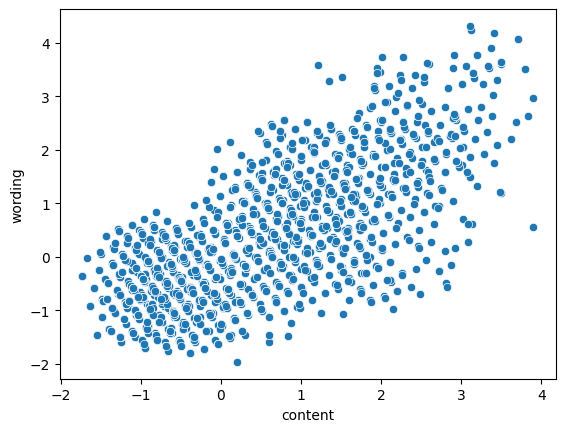

In [ ]:
sns.scatterplot(data=df_train, x="content", y="wording")
plt.show()

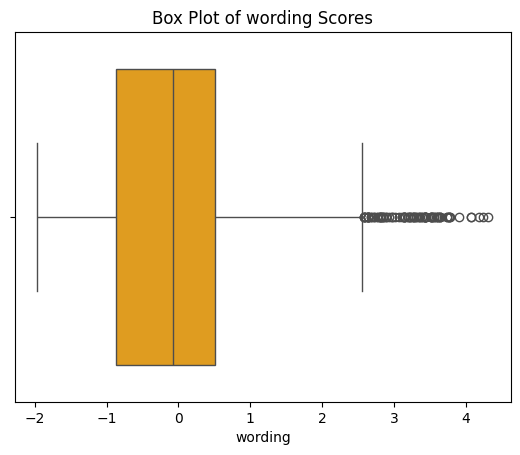

In [ ]:
sns.boxplot(x=df_train['wording'], color='orange')
plt.title('Box Plot of wording Scores')
plt.show()

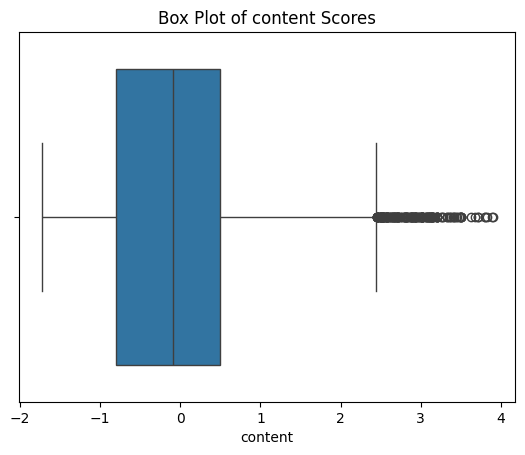

In [ ]:
sns.boxplot(x=df_train['content'])
plt.title('Box Plot of content Scores')
plt.show()

### Insights:
From the above graphs it is clear that there are some outliers

In [ ]:
Q1_content = df_train['content'].quantile(0.25)
Q3_content = df_train['content'].quantile(0.75)
IQR_content = Q3_content - Q1_content

Q1_wording = df_train['wording'].quantile(0.25)
Q3_wording = df_train['wording'].quantile(0.75)
IQR_wording = Q3_wording - Q1_wording

lower_bound_content = Q1_content - 1.5 * IQR_content
upper_bound_content = Q3_content + 1.5 * IQR_content

lower_bound_wording = Q1_wording - 1.5 * IQR_wording
upper_bound_wording = Q3_wording + 1.5 * IQR_wording

data_no_outliers = df_train[
    (df_train['content'] >= lower_bound_content) & (df_train['content'] <= upper_bound_content) &
    (df_train['wording'] >= lower_bound_wording) & (df_train['wording'] <= upper_bound_wording)
]


In [ ]:
data_no_outliers.head()

,prompt_question,prompt_text,text,content,wording
0,Summarize at least 3 elements of an ideal trag...,Chapter 13 \r\nAs the sequel to what has alrea...,1 element of an ideal tragedy is that it shoul...,-0.210614,-0.471415
1,Summarize at least 3 elements of an ideal trag...,Chapter 13 \r\nAs the sequel to what has alrea...,The three elements of an ideal tragedy are: H...,-0.970237,-0.417058
2,Summarize at least 3 elements of an ideal trag...,Chapter 13 \r\nAs the sequel to what has alrea...,Aristotle states that an ideal tragedy should ...,-0.387791,-0.584181
3,Summarize at least 3 elements of an ideal trag...,Chapter 13 \r\nAs the sequel to what has alrea...,One element of an Ideal tragedy is having a co...,0.088882,-0.594710
4,Summarize at least 3 elements of an ideal trag...,Chapter 13 \r\nAs the sequel to what has alrea...,The 3 ideal of tragedy is how complex you need...,-0.687288,-0.460886


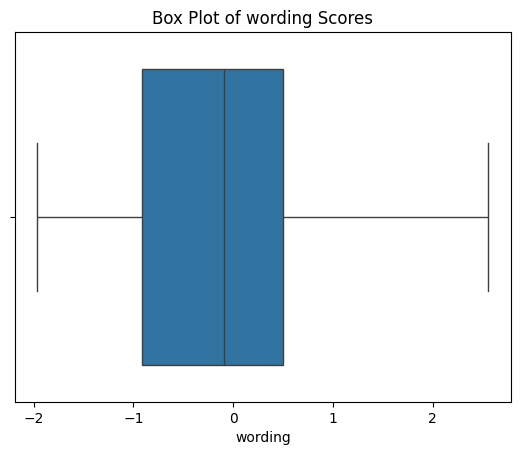

In [ ]:

sns.boxplot(x=data_no_outliers['wording'])
plt.title('Box Plot of wording Scores')
plt.show()

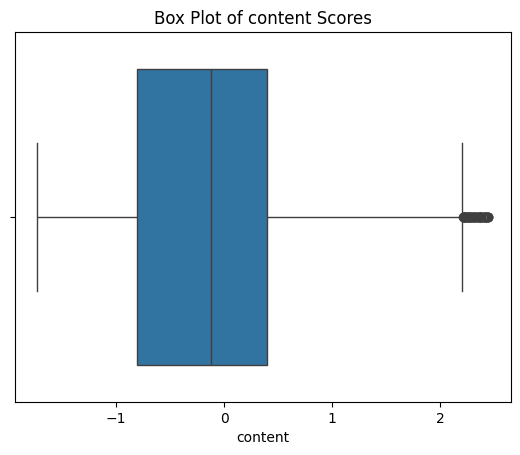

In [ ]:
sns.boxplot(x=data_no_outliers['content'])
plt.title('Box Plot of content Scores')
plt.show()

In [ ]:

data_no_outliers.describe()

,content,wording
count,6965.000000,6965.000000
mean,-0.095032,-0.129025
std,0.939845,0.955791
min,-1.729859,-1.962614
25%,-0.810574,-0.911973
50%,-0.125522,-0.090227
75%,0.397284,0.503833
max,2.443877,2.557609


In [ ]:
df = data_no_outliers

In [ ]:
nlp = spacy.load("en_core_web_md")

In [ ]:
def count_stopwords(text: str) -> int:
    stopwords_list = set(stopwords.words('english'))
    words = text.split()
    stopwords_count = sum(1 for word in words if word.lower() in stopwords_list)
    return stopwords_count

def count_punctuation(text: str) -> int:
    punctuation_set = set(string.punctuation)
    punctuation_count = sum(1 for char in text if char in punctuation_set)
    return punctuation_count

def count_numbers(text: str) -> int:
    numbers = re.findall(r'\d+', text)
    numbers_count = len(numbers)
    return numbers_count

def collapse_dots(input):
    # Collapse sequential dots
    input = re.sub("\.+", ".", input)
    # Collapse dots separated by whitespaces
    all_collapsed = False
    while not all_collapsed:
        output = re.sub(r"\.(( )*)\.", ".", input)
        all_collapsed = input == output
        input = output
    return output

def clean_text(text:str, join_back=True):
  result = []
  sentences = sent_tokenize(text)
  sentences = [collapse_dots(sentence) for sentence in sentences]
  sentences = [sentence.strip() for sentence in sentences]

  for sentence in sentences:
    words = word_tokenize(sentence)

    words = [re.sub(r'\s+', ' ', word) for word in words]
    words = [re.sub(r'[^a-zA-Z\s]', '', word) for word in words]
    words = [re.sub(r'[^\w\s]', '', word) for word in words]
    words = [word.lower() for word in words]
    # words = [word for word in words if word not in stop_words]
    filtered_sentence = " ".join(words)
    result.append(filtered_sentence)

  return " ".join(result)

def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text

def remove_extra_space(text:str):
  text = re.sub(r'\s+', ' ', text)
  text = text.strip()
  return text

def count_total_words(text: str) -> int:
    words = text.split()
    total_words = len(words)
    return total_words

def count_syllables(word):
    # Simple syllable counting (an approximation)
    vowels = "aeiouAEIOU"
    syllables = sum(1 for char in word if char in vowels)
    return syllables

def automated_readability_indexs(text):

    doc = nlp(text)
    # Calculate the number of words
    word_count = len(doc)

    # Calculate the number of sentences
    sentence_count = len(list(doc.sents))

    # Calculate the average number of letters per word
    letters_per_word = sum(len(word.text) for word in doc) / word_count

    # Calculate the average number of words per sentence
    words_per_sentence = word_count / sentence_count if sentence_count > 0 else 0

    # Calculate the ARI
    ari = 4.71 * letters_per_word + 0.5 * words_per_sentence - 21.43

    return ari

def coleman_liau_indexs(text):
    doc = nlp(text)
    words = list(doc)
    word_count = len(words)
    sentence_count = len(list(doc.sents))

    # Calculate the average number of letters per 100 words
    letters_per_100_words = (sum(len(word.text) for word in words) / word_count) * 100

    # Calculate the average number of sentences per 100 words
    sentences_per_100_words = (sentence_count / word_count) * 100

    # Calculate the Coleman-Liau Index
    coleman_liau = 0.0588 * letters_per_100_words - 0.296 * sentences_per_100_words - 15.8
    return coleman_liau

def flesch_kincaid_score(text):
    doc = nlp(text)
    words = list(doc)
    word_count = len(words)
    sentence_count = len(list(doc.sents))

    # Calculate the average number of syllables per word
    syllables_per_word = sum(count_syllables(word.text) for word in words) / word_count

    # Calculate the average number of words per sentence
    words_per_sentence = word_count / sentence_count

    # Calculate the Flesch-Kincaid Grade Level
    flesch_kincaid = 0.39 * words_per_sentence + 11.8 * syllables_per_word - 15.59
    return flesch_kincaid


def gunning_fog_index(text):
  text = text
  return gunning_fog(text)


# Function to count verbs
def count_verbs(text):
    doc = nlp(text)
    verbs = [token for token in doc if token.pos_ == "VERB"]
    return len(verbs)

# Function to count adjectives
def count_adjectives(text):
    doc = nlp(text)
    adjectives = [token for token in doc if token.pos_ == "ADJ"]
    return len(adjectives)

# Function to count adverbs
def count_adverbs(text):
    doc = nlp(text)
    adverbs = [token for token in doc if token.pos_ == "ADV"]
    return len(adverbs)

# Function to count nouns
def count_nouns(text):
    doc = nlp(text)
    nouns = [token for token in doc if token.pos_ == "NOUN"]
    return len(nouns)

# Function to count pronouns
def count_pronouns(text):
    doc = nlp(text)
    pronouns = [token for token in doc if token.pos_ == "PRON"]
    return len(pronouns)

def count_specific_pos(text, pos_tag):
    # Count the number of words with a specific part-of-speech tag (e.g., "ADP" for prepositions)
    doc = nlp(text)
    pos_count = sum(1 for token in doc if token.pos_ == pos_tag)
    return pos_count

def count_bigrams(text: str) -> int:
    words = word_tokenize(text)
    bigrams = list(ngrams(words, 2))
    return len(bigrams)

def count_trigrams(text: str) -> int:
    words = word_tokenize(text)
    trigrams = list(ngrams(words, 3))
    return len(trigrams)

spell = SpellChecker()

def misspelled_cnt(text):
  spell = SpellChecker()
  misspelled = spell.unknown(text.split())
  count = len(misspelled)
  return count


def unique_count(text):
  doc = nlp(text)
  words = [token.text for token in doc]
  unique = len(set(words))
  return unique

def remove_stopword(text):
    text_tokens = word_tokenize(text)
    text_tokens = [word for word in text_tokens if word not in stop_words]
    return ' '.join(text_tokens)




def cosine_similarity_text_prompt(text, prompt_text):
    # Tokenize and remove stopwords



    # Create TF-IDF vectors for text and prompt_text
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([text, prompt_text])

    # Calculate cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])

    return cosine_sim[0][0]

def cosine_similarity_text_title(text, prompt_title):


    # Create TF-IDF vectors for text and prompt_title
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([text, prompt_title])

    # Calculate cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])

    return cosine_sim[0][0]

In [ ]:
df['text_cnt_stopwords'] = df['text'].apply(lambda x: count_stopwords(x))
df['prompt_text_cntstopwrd'] = df['prompt_text'].apply(lambda x: count_stopwords(x))


In [ ]:
df['prompt_text_cntnumbers'] = df['prompt_text'].apply(lambda x: count_numbers(x))
df['text_cntnumbers'] = df['text'].apply(lambda x: count_numbers(x))


In [ ]:
df['prompt_text_cntpunct'] = df['prompt_text'].apply(lambda x: count_punctuation(x))
df['text_cntpunct'] = df['text'].apply(lambda x: count_punctuation(x))

In [ ]:
# want to remove all the stopwords other than not , since if we remove 'not' it may affect the meaning of the sentence

stop_words = set(stopwords.words('english'))
stop_words.remove('not')


In [ ]:
df['prompt_question'] = df['prompt_question'].apply(lambda x: clean_text(x))
df['prompt_text'] = df['prompt_text'].apply(lambda x: clean_text(x))
df['text'] = df['text'].apply(lambda x: clean_text(x))

In [ ]:
df['prompt_question'] = df['prompt_question'].apply(lambda x:remove_extra_space(x))
df['prompt_text'] = df['prompt_text'].apply(lambda x:remove_extra_space(x))
df['text'] = df['text'].apply(lambda x:remove_extra_space(x))

In [ ]:
df['text_wordcnt'] = df['text'].apply(lambda x: count_total_words(x))
df['prompt_text_wordcnt'] = df['prompt_text'].apply(lambda x: count_total_words(x))

In [ ]:
# to find the no of characters in  the text
df['text_length'] = df['text'].apply(lambda x: len(x))
df['prompt_text_length'] = df['prompt_text'].apply(lambda x: len(x))

In [ ]:
df['text_syllablecnt'] = df['text'].apply(lambda x: count_syllables(x))
df['prompt_text_syllablecnt'] = df['prompt_text'].apply(lambda x: count_syllables(x))

In [ ]:
df['text_ARI'] =  df['text'].apply(lambda x: round(automated_readability_indexs(x),2))
df['text_CLI'] =  df['text'].apply(lambda x: round(coleman_liau_indexs(x),2))
df['text_FKG'] =  df['text'].apply(lambda x: round(flesch_kincaid_score(x),2))
df['text_GFI'] =  df['text'].apply(lambda x: round(gunning_fog_index(x),2))

In [ ]:
df['text_cntverb'] =  df['text'].apply(lambda x: count_verbs(x))
df['text_cntadjctv'] =  df['text'].apply(lambda x: count_adjectives(x))
df['text_cntadvrb'] =  df['text'].apply(lambda x: count_adverbs(x))
df['text_cntnoun'] =  df['text'].apply(lambda x: count_nouns(x))
df['text_cntpronoun'] =  df['text'].apply(lambda x: count_pronouns(x))
df['text_cntspecificpos'] =  df['text'].apply(lambda x: count_specific_pos(x,'ADP'))

In [ ]:
df['text_bigram'] = df['text'].apply(lambda x: count_bigrams(x))
df['text_trigram'] = df['text'].apply(lambda x: count_trigrams(x))
df['text_misspellcnt'] = df['text'].apply(lambda x: misspelled_cnt(x))
df['text_unique'] = df['text'].apply(lambda x: unique_count(x))

In [ ]:
df['text_clean'] = df['text'].apply(lambda x:remove_stopword(x))
df['prompttext_clean'] = df['prompt_text'].apply(lambda x:remove_stopword(x))
df['promptqtn_clean'] = df['prompt_question'].apply(lambda x:remove_stopword(x))

In [ ]:
df['prompttext_clean'] = df['prompttext_clean'].apply(lambda x:lemmatize_text(x))
df['promptqtn_clean'] = df['promptqtn_clean'].apply(lambda x:lemmatize_text(x))
df['text_clean'] = df['text_clean'].apply(lambda x:lemmatize_text(x))

In [ ]:
df['cos_similarity_text_prompt'] = df.apply(lambda row: cosine_similarity_text_prompt(row['text_clean'], row['prompttext_clean']), axis=1)
df['cos_similarity_text_promptqtn'] = df.apply(lambda row: cosine_similarity_text_prompt(row['text_clean'], row['promptqtn_clean']), axis=1)


In [ ]:
df.drop(columns = ['prompt_question','prompt_text','text'], axis = 1, inplace = True)

In [ ]:
df.shape

(6965, 33)

In [ ]:
df.head(2)

,content,wording,text_cnt_stopwords,prompt_text_cntstopwrd,prompt_text_cntnumbers,text_cntnumbers,prompt_text_cntpunct,text_cntpunct,text_wordcnt,prompt_text_wordcnt,...,text_cntspecificpos,text_bigram,text_trigram,text_misspellcnt,text_unique,text_clean,prompttext_clean,promptqtn_clean,cos_similarity_text_prompt,cos_similarity_text_promptqtn
0,-0.210614,-0.471415,31,305,1,1,96,3,55,598,...,5,54,53,0,33,element ideal tragedy arrange complex plan ano...,chapter sequel already say must proceed consid...,summarize least element ideal tragedy describe...,0.167416,0.362226
1,-0.970237,-0.417058,12,305,1,0,96,6,26,598,...,2,25,24,1,25,three element ideal tragedy character not bad ...,chapter sequel already say must proceed consid...,summarize least element ideal tragedy describe...,0.172985,0.199333


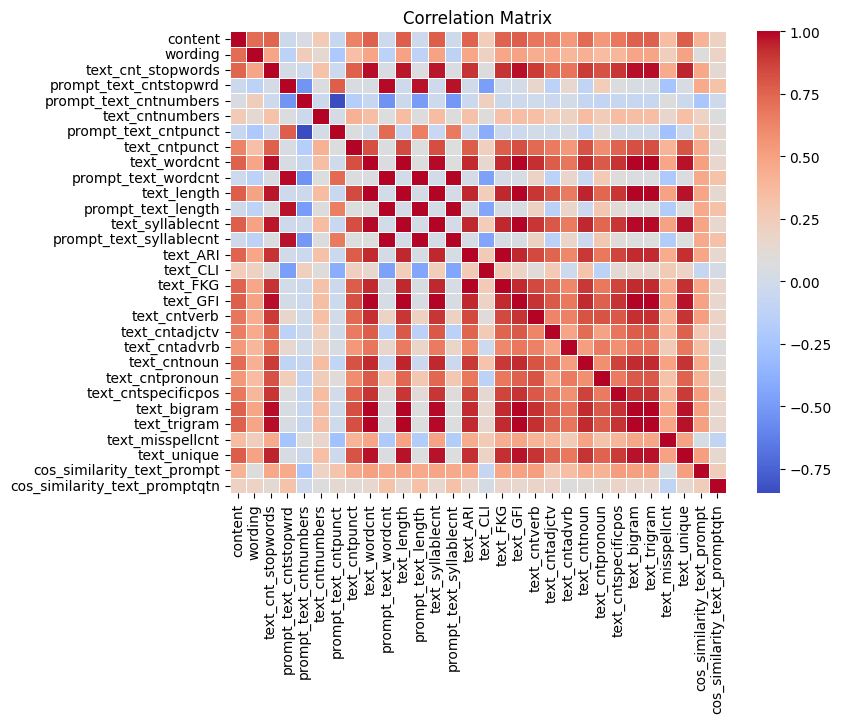

In [ ]:
correlation_matrix = df.corr()

# Plotting a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
new_df = df

In [ ]:
cor_matrix = new_df.corr()

correlation_threshold = 0.3

# Identifying low correlated features
low_correlation_features_content = cor_matrix[abs(cor_matrix['content']) < correlation_threshold].index

low_correlation_features_content

Index(['prompt_text_cntstopwrd', 'prompt_text_cntnumbers', 'text_cntnumbers',
       'prompt_text_cntpunct', 'prompt_text_wordcnt', 'prompt_text_length',
       'prompt_text_syllablecnt', 'text_CLI', 'cos_similarity_text_promptqtn'],
      dtype='object')

In [ ]:
# Identifying low correlated features
low_correlation_features_wording = cor_matrix[abs(cor_matrix['wording']) < correlation_threshold].index

low_correlation_features_wording

Index(['prompt_text_cntstopwrd', 'prompt_text_cntnumbers', 'text_cntnumbers',
       'prompt_text_cntpunct', 'prompt_text_wordcnt', 'prompt_text_length',
       'prompt_text_syllablecnt', 'text_CLI', 'text_misspellcnt',
       'cos_similarity_text_prompt', 'cos_similarity_text_promptqtn'],
      dtype='object')

In [ ]:
low_correlation_features = []
for i in low_correlation_features_content:
  if i in low_correlation_features_wording:
    low_correlation_features.append(i)

In [ ]:
low_correlation_features

['prompt_text_cntstopwrd',
 'prompt_text_cntnumbers',
 'text_cntnumbers',
 'prompt_text_cntpunct',
 'prompt_text_wordcnt',
 'prompt_text_length',
 'prompt_text_syllablecnt',
 'text_CLI',
 'cos_similarity_text_promptqtn']

In [ ]:
new_df = new_df.drop(low_correlation_features,axis = 1)

In [ ]:
new_df.columns

Index(['content', 'wording', 'text_cnt_stopwords', 'text_cntpunct',
       'text_wordcnt', 'text_length', 'text_syllablecnt', 'text_ARI',
       'text_FKG', 'text_GFI', 'text_cntverb', 'text_cntadjctv',
       'text_cntadvrb', 'text_cntnoun', 'text_cntpronoun',
       'text_cntspecificpos', 'text_bigram', 'text_trigram',
       'text_misspellcnt', 'text_unique', 'text_clean', 'prompttext_clean',
       'promptqtn_clean', 'cos_similarity_text_prompt'],
      dtype='object')

In [ ]:
new_df = new_df.drop(['text_FKG'],axis = 1)

In [ ]:
new_df.head(2)

,content,wording,text_cnt_stopwords,text_cntpunct,text_wordcnt,text_length,text_syllablecnt,text_ARI,text_GFI,text_cntverb,...,text_cntpronoun,text_cntspecificpos,text_bigram,text_trigram,text_misspellcnt,text_unique,text_clean,prompttext_clean,promptqtn_clean,cos_similarity_text_prompt
0,-0.210614,-0.471415,31,3,55,285,94,25.85,24.18,3,...,3,5,54,53,0,33,element ideal tragedy arrange complex plan ano...,chapter sequel already say must proceed consid...,summarize least element ideal tragedy describe...,0.167416
1,-0.970237,-0.417058,12,6,26,143,44,12.95,15.02,3,...,2,2,25,24,1,25,three element ideal tragedy character not bad ...,chapter sequel already say must proceed consid...,summarize least element ideal tragedy describe...,0.172985


In [ ]:
new_df.to_csv('/content/drive/MyDrive/Colab Notebooks/My_project/dataset.csv', index = False)

In [ ]:
new_df.columns

Index(['content', 'wording', 'text_cnt_stopwords', 'text_cntpunct',
       'text_wordcnt', 'text_length', 'text_syllablecnt', 'text_ARI',
       'text_GFI', 'text_cntverb', 'text_cntadjctv', 'text_cntadvrb',
       'text_cntnoun', 'text_cntpronoun', 'text_cntspecificpos', 'text_bigram',
       'text_trigram', 'text_misspellcnt', 'text_unique', 'text_clean',
       'prompttext_clean', 'promptqtn_clean', 'cos_similarity_text_prompt'],
      dtype='object')

In [ ]:
order = ['text_clean','prompttext_clean','promptqtn_clean','text_cnt_stopwords', 'text_cntpunct',
       'text_wordcnt', 'text_length', 'text_syllablecnt', 'text_ARI',
       'text_GFI', 'text_cntverb', 'text_cntadjctv', 'text_cntadvrb',
       'text_cntnoun', 'text_cntpronoun', 'text_cntspecificpos', 'text_bigram',
       'text_trigram', 'text_misspellcnt', 'text_unique','cos_similarity_text_prompt','content', 'wording']

In [ ]:
new_df = new_df[order]

In [ ]:
new_df.head(2)

,text_clean,prompttext_clean,promptqtn_clean,text_cnt_stopwords,text_cntpunct,text_wordcnt,text_length,text_syllablecnt,text_ARI,text_GFI,...,text_cntnoun,text_cntpronoun,text_cntspecificpos,text_bigram,text_trigram,text_misspellcnt,text_unique,cos_similarity_text_prompt,content,wording
0,element ideal tragedy arrange complex plan ano...,chapter sequel already say must proceed consid...,summarize least element ideal tragedy describe...,31,3,55,285,94,25.85,24.18,...,11,3,5,54,53,0,33,0.167416,-0.210614,-0.471415
1,three element ideal tragedy character not bad ...,chapter sequel already say must proceed consid...,summarize least element ideal tragedy describe...,12,6,26,143,44,12.95,15.02,...,6,2,2,25,24,1,25,0.172985,-0.970237,-0.417058


In [ ]:
new_df.to_csv('/content/drive/MyDrive/Colab Notebooks/My_project/cleaneddataset.csv', index = False)
